이제 Google Drive와 연동하는 법을 진행해보겠습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


colab에서는 linux 명령어를 사용할 수 있습니다.

현재 위치에 존재하는 파일, 폴더를 확인하고싶다: !ls

다른 경로로 이동하고 싶다: %cd

In [ ]:
!ls

In [ ]:
%cd gdrive/MyDrive/Colab Notebooks/Lecture/AIMath
!ls

In [ ]:
import numpy as np
from math import factorial
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(1000)

우선 Variance를 구해보도록 하겠습니다.

ddof 등이 궁금할 때는, google 에서 numpy var ddof 등으로 검색해보시는 것을 추천 드립니다.

https://numpy.org/doc/stable/reference/generated/numpy.var.html

In [ ]:
x = [10,20,30,40,50]
biased_sample_variance = np.var(x,ddof=0)
unbiased_sample_variance = np.var(x,ddof=1)

print(biased_sample_variance,unbiased_sample_variance)

1. Variance 및 Covariance를 구해보도록 하겠습니다.

var_x 에는 x의 variance가 나오도록 만드세요 (전체 개수를 n이라고 할 때, n-1로 나누는 sample variance로 구하세요)

var_y 에는 y의 variance가 나오도록 만드세요 (전체 개수를 n이라고 할 때, n-1로 나누는 sample variance로 구하세요)

cov_xy 에는 x와 y의 sample covariance를 나타내는 matrix가 나오도록 만드세요.
즉, 2 by 2 행렬이 나오게 됩니다.

cov_xy, var_x, var_y를 비교해보세요.

In [ ]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]

var_x = np.?????
var_y = np.?????
cov_xy = np.?????

print(cov_xy, var_x, var_y)

이번에는 covariance와 correlation을 비교해보겠습니다.

주어진 데이터 x,y 숫자의 scale이 커지더라도, correlation은 안정적입니다.

In [ ]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]
cov_xy = np.cov(x,y,ddof=1)
corr_xy = np.corrcoef(x,y,ddof=1)
print(cov_xy,corr_xy)

In [ ]:
x = [10,20,30,40,50]
y = [20,40,60,80,100]
cov_xy = np.cov(x,y,ddof=1)
corr_xy = np.corrcoef(x,y,ddof=1)
print(cov_xy,corr_xy)

2. 이번에는 Covariance를 직접 한번 구해보도록 하겠습니다.

custom_cov의 빈칸을 채워서,
직접 x와 y의 sample covariance를 계산해보세요.
(필요시 wikipedia 참조, https://en.wikipedia.org/wiki/Covariance)

< 정답 >
[[ 2.5 5. ]
[ 5. 10. ]] 2.5 10.0
5.0

In [ ]:
def custom_cov(a, b):

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    total_sum = 0
    for i in range(0, len(a)):
        total_sum += ?????

    return total_sum/(len(a)-1)

custom_cov_xy = custom_cov(x, y)
print(custom_cov_xy)

이번에는 multinomial distribution에 대해서 실습해보겠습니다.

3-1. multi 에는 n=6, 그리고 선택지가 3개고 각 선택지가 채택될 확률이 0.1, 0.5, 0.4 인 multinmoial 분포에서 샘플링 해보세요.

참고로, normal distribution의 경우에는 다음과 같이 sampling이 가능했습니다.

x = np.random.normal(loc=3, scale=1) 

multinomial 도 비슷하겠죠?! :)

In [ ]:
probs = [0.1,0.5,0.4]
multi = ?????

3-2 max_index 에는, 가장 많이 채택된 선택지의 index를 받아오세요.

In [ ]:
max_index = ?????(multi)

3-3 multinomial_pmf 자리에 빈칸을 채워 multi가 (sampling 된 값) 결과로 나올 확률값을 내뱉도록 만드세요.
a에는 p1^y1*p2^y2…. 가 오도록
b에는 y1!y2!… 가 오도록
c에는 n! 가 오도록 만드세요.

indexing을 해서 각각 먼저 계산해보세요.
계산이 완료되고 시간이 남으면, prod 를 활용해서, 더 효율적으로 구현해보세요.

In [ ]:
def multinomial_pmf(counts, probs):
    probs = np.asarray(probs) #   [0.1, 0.5, 0.4]
    counts = np.asarray(counts) # [1  , 3,   2]
    a = ?????
    b = ?????
    c = ?????
    return a * c / b

pmf = multinomial_pmf(multi, probs)
print(multi, max_index, pmf)

이번에는 3-D plot을 그려봅시다.

https://jehyunlee.github.io/2021/07/10/Python-DS-80-mpl3d2/

ax.view_init 을 활용하면, 각도를 조절할 수 있습니다.

ax.view_init(elev,azim), elev:elevation angle, azim:azimuth angle

(http://www.ece.northwestern.edu/local-apps/matlabhelp/techdoc/visualize/chview3.html)

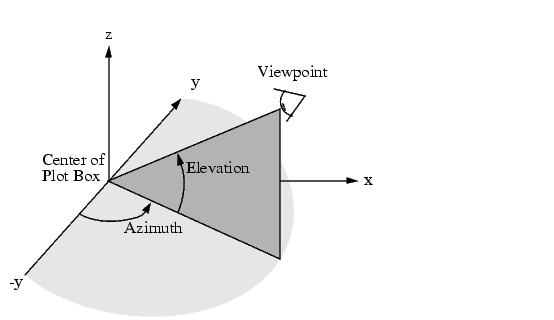


In [ ]:
# Create grid and multivariate normal
y1 = np.linspace(0, 1, 200) # Create a mesh of 200 y1-points
y2 = np.linspace(0, 1, 200) # Create a mesh of 200 y2-points

Y1, Y2 = np.meshgrid(y1,y2)
Z = np.ones_like(Y1)

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(Y1, Y2, Z, cmap=cm.coolwarm)
ax.view_init(10, 60)
plt.show()

4. $Z=2Y_{1}$ 의 그림을 그려보세요

In [ ]:
# Create grid and multivariate normal
y1 = np.linspace(0, 1, 200) # Create a mesh of 200 y1-points
y2 = np.linspace(0, 1, 200) # Create a mesh of 200 y2-points

Y1, Y2 = np.meshgrid(y1,y2)
Z = ?????

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(Y1, Y2, Z, cmap=cm.coolwarm)
ax.view_init(10, 60)
plt.show()